<h3><div style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 42px;
            font-weight: bold;">Unveiling the Hidden Potential of Tail Spend Analysis: A Comprehensive Guide to Excel Data Preparation with Python</div></h3>

<h3><div style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 18px;
            font-weight: bold;">Table of Contents</div></h3>

- [📝 Introduction](#intro)<br><br>
- [🧐 Objective](#objective)<br><br>
- [📑 Data Preparation](#preparation)<br><br>
- [🕵️‍♂️ Result](#result)<br><br>
- [⚙️ Generating a new Dataset](#dataset)<br><br>
- [✍🏻 Conclusion](#conclusion)<br><br>

<h1 id = 'intro' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">📝 Introduction</h1>

Tail Spend Analysis has a history dating back to World War II, and it has been elucidated through various guidelines. Perhaps the most renowned of these is the 80/20 rule, also known as the Pareto principle. While having a conceptual understanding is invaluable, the practical implementation of such principles presents its own set of challenges.

In the realm of procurement, datasets are frequently beset with issues of cleanliness, and a multitude of complexities often render the straightforward application of the 80/20 rule unfeasible. To address these challenges, a plethora of spend analysis tools have emerged in the market. Many of these tools boast advanced machine learning or AI capabilities, promising seemingly magical cost-saving outcomes. However, it's essential to note that reality doesn't always align with these claims.

The true identification of cost-saving opportunities hinges not solely on the capabilities of the tool but on the skill set of the buyer. While these tools can certainly streamline the process, the buyer's ability to discern what they are seeking within the data remains paramount. In essence, no tool can replace the buyer's expertise in this regard.

Join us on a journey through this comprehensive guide as we uncover the latent potential within tail spend management, leveraging the formidable capabilities of Python to prepare Excel data.

<h1 id = 'objective' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">🧐 Objective</h1>

Before we proceed to define our objective, let's begin by addressing the question: What is tail spend?

Tail spend is a term used to describe the portion of an organization's expenditures allocated to purchases that represent roughly 80% of transactions but contribute only about 20% to the total spend volume. To help visualize this concept, refer to the accompanying image for a practical example.

![Alt text](image-1.png)

Source: https://simfoni.com/tail-spend-management-guide/

**Objective** 

The objective of this study is to chart the data for Hidden Tail from our given dataset using Python.

<h1 id = 'preparation' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">📑 Data Preparation</h1>

Prior to initiating any analytical activities, it is imperative to gain a comprehensive understanding of the dataset in its current state and the information it encompasses. This preliminary step is mandatory and serves as the foundation upon which we can craft an effective strategy for further dataset processing. Below, I outline a series of swift assessments that I routinely conduct before embarking on any analysis:

1. **Data Completeness:** Verify if the dataset is complete and if there are any missing values that need to be addressed.

2. **Data Quality:** Assess the overall quality of the data, including potential errors, inconsistencies, or outliers.

3. **Data Structure:** Understand the structure of the dataset, including the types of variables, their formats, and relationships between them.

4. **Data Distribution:** Examine the distribution of key variables to identify potential patterns or anomalies.

5. **Data Relevance:** Determine if the dataset contains the necessary information for the intended analysis or if additional data sources are required.

6. **Data Documentation:** Review any available documentation or metadata to understand the context and source of the data.

7. **Data Security:** Ensure that data handling and analysis comply with data security and privacy regulations.

8. **Data Exploration:** Conduct initial data exploration to identify potential trends or insights that may guide the analysis.

By diligently conducting these checks, we establish a solid groundwork for robust and informed data analysis and strategy development.

The dataset used for this study is in Github, you may find the link here: [Tail Spend Dataset](https://github.com/sedeba19/Tail-Spend-Dataset)

We are about to add now new columns to increase our dataset's depth and range of information. These additional columns are:
* **Spend Class:** is to separate Major Spend from Tail Spend as a group. By successfully dividing Major spend commodity items from Tail spend item, we can develop different strategies for both accordingly. To decide whether a particular commodity item belongs to either Tail or Major spend category, we will use our good old Pareto or 80/20 principle. Every commodity item that belongs within the Top 80% spend class will be labeled as Major. Every commodity item that belongs to the bottom 20% spend class will be labeled as Tail Spend.

* **Contract:** measures whether a particular commodity item has been sourced from a via contract or not (i.e. Spot Purchase). The objective is to find commodities that are produced outside of the Contracts or commodities that do not have any contract. We should always strive for securing have a longer duration and often with fixed quantity and/or price commitments, the buyer is likely to get a better price per unit that from that Individual/Spot purchase. Like Spend Class, this label is also a binary field. For every item that is purchased, if the contract number exists, we will write "Contract Avaialable, otherwise, we will write "Contract Not Available"

* **PO Availability:** measures whether a particular commodity item has been purchased via a Purchase Order or not. Please note purchases conducted with a PO are often termed as "Maverick Purchases" and the spend value under such purchases is often called "Maverick Spend". The best practice suggest minimizing the Maverick Spend as much as possible. By adding this label to our dataset, our objective is to find the following answers:

    >1. How much Maverick spend do we have?
    >2. How much one time purchases do we have?
    >3. What is the spend where we have a contract present but do not have a purchase order?
    
* **Number of Vendors:** measures the count of vendor for every commodity item in the dataset. We need this for further segmentation into the following: High number of vendors, Medium number of vendors, and the low number of vendor classes. This is aid us to form different procurement strategies for commodity items belonging to different classes. As an example:

    >1. Items with the high number of vendors: Strategy should be to reduce the number of vendors. Hence, we can focus more on price competition to eliminate excess vendors.
    >2. Items with the low number of vendors: Strategy should be to develop new vendors. Hence, we should focus on quality and finding new vendors rather than price competition. The elimination of the vendor is not an option here.
    
* **Vendor Classification:** is to measure the number of vendor available in a certain type of commodity. By using this, we can get insights on our supplier base. Commodities with a single vendor might be riskier due to supplier dependency, while with multiple vendors provide more flexibility. One benefit example of this is.
    >1. Knowing which commodities have multiple suppliers can help in building resilient supply chains by identifying potential alternatives during disruptions.

* **PO Classification:** is to measure and analyze the spending patterns. Such as for product or service categories helps in monitoring and controlling expenditues within specific categories, ensuring compliance with budgetary constraints.


In [1]:
# Import the libraries that would be needed for the data exploration
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_dir = r'/home/sedeba19/medium_content/ai_procurement/data/spend_tail_dataset.xlsx'
df = pd.read_excel(file_dir)

In [3]:
df.shape

(72853, 21)

In [4]:
df.columns

Index(['COMMODITY', 'COMMODITY_DESCRIPTION', 'EXTENDED_DESCRIPTION',
       'QUANTITY', 'UNIT_OF_MEASURE', 'UNIT_OF_MEAS_DESC', 'UNIT_PRICE',
       'ITM_TOT_AM', 'MASTER_AGREEMENT', 'CONTRACT_NAME', 'PURCHASE_ORDER',
       'AWARD_DATE', 'VENDOR_CODE', 'LGL_NM', 'AD_LN_1', 'AD_LN_2', 'CITY',
       'ST', 'ZIP', 'CTRY', 'DATA_BUILD_DATE'],
      dtype='object')

In [5]:
comm_desc_sum = df.groupby('COMMODITY_DESCRIPTION')['ITM_TOT_AM'].sum().reset_index()
comm_desc_sum[:5]

,COMMODITY_DESCRIPTION,ITM_TOT_AM
0,0.4% Lidocaine D5W 250ml Hospira (Abbott Labs...,337.92
1,0.9% Sodium Chloride 1000ml Hospira (Abbott L...,38590.36
2,0.9% Sodium Chloride 250ml Hospira (Abbott La...,11039.59
3,0.9% Sodium Chloride 50ml Hospira (Abbott Lab...,4337.20
4,102.4 3-SET O2-RESQ SYSTEM INCLUDES ADULT-MED....,46403.40


In [6]:
total_sum = comm_desc_sum['ITM_TOT_AM'].sum()
comm_desc_sum['% Total Running In'] = 0
comm_desc_sum.head()

,COMMODITY_DESCRIPTION,ITM_TOT_AM,% Total Running In
0,0.4% Lidocaine D5W 250ml Hospira (Abbott Labs...,337.92,0
1,0.9% Sodium Chloride 1000ml Hospira (Abbott L...,38590.36,0
2,0.9% Sodium Chloride 250ml Hospira (Abbott La...,11039.59,0
3,0.9% Sodium Chloride 50ml Hospira (Abbott Lab...,4337.20,0
4,102.4 3-SET O2-RESQ SYSTEM INCLUDES ADULT-MED....,46403.40,0


In [7]:
comm_desc_sum['temp'] = 0

length = len(comm_desc_sum)
comm_desc_sum.loc[0, 'temp'] = comm_desc_sum.loc[0, 'ITM_TOT_AM']

for i in range(1, length):
    comm_desc_sum.loc[i, 'temp'] = comm_desc_sum.loc[i - 1, 'temp'] + comm_desc_sum.loc[i, 'ITM_TOT_AM']

/tmp/ipykernel_58262/392091930.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '337.92' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  comm_desc_sum.loc[0, 'temp'] = comm_desc_sum.loc[0, 'ITM_TOT_AM']


In [8]:
comm_desc_sum['ITM_TOT_AM'].sum()
for i in range(length):
    comm_desc_sum['% Total Running In'][i] = (comm_desc_sum['temp'][i] / comm_desc_sum['ITM_TOT_AM'].sum()) * 100

/tmp/ipykernel_58262/863514314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_desc_sum['% Total Running In'][i] = (comm_desc_sum['temp'][i] / comm_desc_sum['ITM_TOT_AM'].sum()) * 100
/tmp/ipykernel_58262/863514314.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.550441559317351e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  comm_desc_sum['% Total Running In'][i] = (comm_desc_sum['temp'][i] / comm_desc_sum['ITM_TOT_AM'].sum()) * 100


In [9]:
comm_desc_sum['% Total Running In'].max()

100.00000000000009

In [11]:
comm_desc_sum['% Total Running In'][:5]

0    0.000066
1    0.007546
2    0.009686
3    0.010527
4    0.019522
Name: % Total Running In, dtype: float64

**Spend Class:** 

We are about to add a new column (spend_class) in the dataset that will serve as an identifier for the distribution of spending across the dataset. Specifically, we will be introducing the '% Total Running' column. Items falling within the range of 0% to 80% (the top 80% of spending) will be designated as 'Major Spend' items, while those falling within the range of 80% to 100% (the bottom 20% of spending) will be categorized as 'Tail Spend.'

In [12]:
comm_desc_sum['spend_class'] = 0
for i in range(0, length):
    if comm_desc_sum['% Total Running In'][i] <= 80:
       comm_desc_sum.at[i, 'spend_class'] = 'major_spend'
    else:
       comm_desc_sum.at[i, 'spend_class'] = 'tail_spend'

/tmp/ipykernel_58262/1542164856.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'major_spend' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  comm_desc_sum.at[i, 'spend_class'] = 'major_spend'


In [13]:
comm_desc_sum.tail()

,COMMODITY_DESCRIPTION,ITM_TOT_AM,% Total Running In,temp,spend_class
6691,bag bolus blue,4376.90,99.997854,5.158625e+08,tail_spend
6692,embroidered cloth name tag for tactical shirts,871.50,99.998022,5.158634e+08,tail_spend
6693,ems equipment and supplies including kits,1450.00,99.998304,5.158649e+08,tail_spend
6694,"pH Buffer Solutions, Indicators, and Papers",1427.68,99.998580,5.158663e+08,tail_spend
6695,pillows disposable,7323.74,100.000000,5.158736e+08,tail_spend


In [14]:
comm_desc_sum.head()

,COMMODITY_DESCRIPTION,ITM_TOT_AM,% Total Running In,temp,spend_class
0,0.4% Lidocaine D5W 250ml Hospira (Abbott Labs...,337.92,0.000066,337.92,major_spend
1,0.9% Sodium Chloride 1000ml Hospira (Abbott L...,38590.36,0.007546,38928.28,major_spend
2,0.9% Sodium Chloride 250ml Hospira (Abbott La...,11039.59,0.009686,49967.87,major_spend
3,0.9% Sodium Chloride 50ml Hospira (Abbott Lab...,4337.20,0.010527,54305.07,major_spend
4,102.4 3-SET O2-RESQ SYSTEM INCLUDES ADULT-MED....,46403.40,0.019522,100708.47,major_spend


In [16]:
comm_desc_sum.drop('temp', axis = 1, inplace = True)
# Assign 'spend_class' in df based on 'COMMODITY_DESCRIPTION' in comm_desc_sum
df['spend_class'] = df['COMMODITY_DESCRIPTION'].map(comm_desc_sum.set_index('COMMODITY_DESCRIPTION')['spend_class'])

In [18]:
df.shape

(72853, 22)

In [19]:
len(df)

72853

In [23]:
df['spend_class'].value_counts()

spend_class
major_spend    61861
tail_spend     10992
Name: count, dtype: int64

We can observe the aggregate values (count) of major spend and tail spend. 
* Major spend (84.912%) typically encompasses substantial and strategically managed procurement activities, often entailing larger contracts or purchases. 
* In contrast, tail spend (15.088%) comprises numerous smaller, often impromptu purchases that may not receive as close scrutiny but, when combined, exert a notable impact on the organization's financial performance.

Despite the individual modest values of these purchases, their cumulative effect can be substantial.







In [24]:
len(df['spend_class']) == df['spend_class'].value_counts().sum()

True

**Contract:** 

Now, we're going to add our second column, 'Contract.' It's a straightforward task. Just look at the 'Master_Agreement' column in the dataset. If it's empty, we'll put 'Contract Not Available,' and if it has any content, we'll write 'Contract Available.' We'll apply this rule to all the cells in the column.

In [25]:
df.columns

Index(['COMMODITY', 'COMMODITY_DESCRIPTION', 'EXTENDED_DESCRIPTION',
       'QUANTITY', 'UNIT_OF_MEASURE', 'UNIT_OF_MEAS_DESC', 'UNIT_PRICE',
       'ITM_TOT_AM', 'MASTER_AGREEMENT', 'CONTRACT_NAME', 'PURCHASE_ORDER',
       'AWARD_DATE', 'VENDOR_CODE', 'LGL_NM', 'AD_LN_1', 'AD_LN_2', 'CITY',
       'ST', 'ZIP', 'CTRY', 'DATA_BUILD_DATE', 'spend_class'],
      dtype='object')

In [26]:
df['MASTER_AGREEMENT']

0        MA2200GA140000076
1        MA1100GA130000040
2        MA8600GA090000006
3        MA7400GC100000003
4                      NaN
               ...        
72848    MA2200GA120000017
72849    MA2200GA110000059
72850                  NaN
72851    MA1100GA080000084
72852    MA6400GA110000076
Name: MASTER_AGREEMENT, Length: 72853, dtype: object

In [27]:
len(df['MASTER_AGREEMENT'])

72853

In [28]:
df['MASTER_AGREEMENT'].isna().sum()

17642

In [29]:
(df['MASTER_AGREEMENT'].isna().sum()/len(df['MASTER_AGREEMENT']))*100

24.21588678571919

We have 24.21% of missing values in Master_Agreement column (no contract).

In [30]:
df['contract'] = 'Contract NOT Available'

for i in range(len(df)):
    if pd.notna(df['MASTER_AGREEMENT'][i]):
        df.at[i, 'contract'] = 'Contract Available'

In [31]:
df['contract'].value_counts()

contract
Contract Available        55211
Contract NOT Available    17642
Name: count, dtype: int64

In [32]:
df['contract'].value_counts().sum() == len(df['MASTER_AGREEMENT'])

True

We have added the contract column with reference to Master_Agreement's column.

**Purchase Order (PO):** 

We will repeat the same steps as we did while adding our Contract Column. If "Purchase_Order" column is blank, we will write "PO Not Available" and if the "Purchase_Order" column is not blank, we will write "PO Available". 

In [33]:
df['PURCHASE_ORDER'].isna().sum()

921

In [34]:
(df['PURCHASE_ORDER'].isna().sum() / len(df['PURCHASE_ORDER']))*100

1.264189532345957

We have a 1.26% missing value on Purchase Order record.

In [35]:
df['PO_availability'] = 'PO NOT Available'

for i in range(len(df)):
    if pd.notna(df['PURCHASE_ORDER'][i]):
        df.at[i, 'PO_availability'] = 'PO Available'

In [36]:
df['PO_availability'].value_counts()

PO_availability
PO Available        71932
PO NOT Available      921
Name: count, dtype: int64

In [37]:
df['PO_availability'].value_counts().sum() == len(df['PO_availability'])

True

We have added the PO availability column with reference to Purchase Order's column.

**Number of Vendors:** 

A pivotal moment has arrived as we embark on the process of calculating the number of vendors for each commodity description. Our objective is to determine how many vendors are associated with each item, and subsequently, categorize them into High, Medium, and Low groups.

While the underlying logic is straightforward, it entails several steps. To begin, we will compile a list of unique vendor names for each commodity description. In simpler terms, this means establishing one-to-many relationships, where one commodity description may be associated with multiple vendor names.

In [38]:
vendor_counts = df.groupby('COMMODITY_DESCRIPTION')['LGL_NM'].nunique().reset_index()
vendor_counts.head()

,COMMODITY_DESCRIPTION,LGL_NM
0,0.4% Lidocaine D5W 250ml Hospira (Abbott Labs...,1
1,0.9% Sodium Chloride 1000ml Hospira (Abbott L...,3
2,0.9% Sodium Chloride 250ml Hospira (Abbott La...,4
3,0.9% Sodium Chloride 50ml Hospira (Abbott Lab...,2
4,102.4 3-SET O2-RESQ SYSTEM INCLUDES ADULT-MED....,1


In [39]:
# Let's find and check row 1 from the vendor_counts df if LGL_NM is totally true
desired_commodity_description = '0.9% Sodium Chloride 1000ml'
filtered_data = df[df['COMMODITY_DESCRIPTION'].str.startswith(desired_commodity_description)]

if not filtered_data.empty:
    vendor_names = filtered_data['LGL_NM'].unique()
    unique_vendor_count = len(vendor_names)

    print(f"Vendor names for '{desired_commodity_description}': {', '.join(vendor_names)}")
    print(f"Number of unique vendors: {unique_vendor_count}")
else:
    print(f"No matching rows found for '{desired_commodity_description}'.")

Vendor names for '0.9% Sodium Chloride 1000ml': HENRY SCHEIN INC, MIDWEST MEDICAL SUPPLY COMPANY, LLC, SOUTHEASTERN EMERGENCY EQUIPMENT
Number of unique vendors: 3


As we can see, row 2 (index 1) on vendor_counts dataframe has the same output.

In [40]:
# Check if MIDWEST MEDICAL SUPPLY COMPANY, LLC, is a totally 1 count vendor (get only the first 2)
df_subset = df[['LGL_NM']]
df_subset[df_subset['LGL_NM'].str.startswith('MIDWEST MEDICAL SUPPLY')][:2]

,LGL_NM
138,"MIDWEST MEDICAL SUPPLY COMPANY, LLC"
187,"MIDWEST MEDICAL SUPPLY COMPANY, LLC"


Yes, confirmed. It is one entity.

In [44]:
vendor_counts['Total_Vendors'] = vendor_counts['LGL_NM']
vendor_counts

,COMMODITY_DESCRIPTION,LGL_NM,Total_Vendors
0,0.4% Lidocaine D5W 250ml Hospira (Abbott Labs...,1,1
1,0.9% Sodium Chloride 1000ml Hospira (Abbott L...,3,3
2,0.9% Sodium Chloride 250ml Hospira (Abbott La...,4,4
3,0.9% Sodium Chloride 50ml Hospira (Abbott Lab...,2,2
4,102.4 3-SET O2-RESQ SYSTEM INCLUDES ADULT-MED....,1,1
...,...,...,...
6691,bag bolus blue,1,1
6692,embroidered cloth name tag for tactical shirts,1,1
6693,ems equipment and supplies including kits,1,1
6694,"pH Buffer Solutions, Indicators, and Papers",1,1


In [ ]:
# for i in range(len(vendor_counts)):
#     if vendor_counts['LGL_NM'][i] == vendor_counts['Total_Vendors'][i]:
#         print(f"Match at index {i}: {vendor_counts['LGL_NM'][i]} equals {vendor_counts['Total_Vendors'][i]}")
#     else:
#         print(f"No match at index {i}: {vendor_counts['LGL_NM'][i]} does not equal {vendor_counts['Total_Vendors'][i]}")

In [45]:
df['Number of vendors'] = df['COMMODITY_DESCRIPTION'].map(vendor_counts.set_index('COMMODITY_DESCRIPTION')['Total_Vendors'])

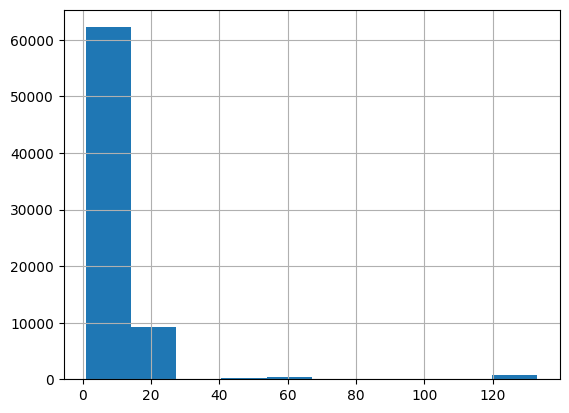

In [46]:
df['Number of vendors'].hist();

We can see a commodity description where in there is a total number of vendors equal or greater than 30. Let's find out what is this commodity description.

In [47]:
filtered_data = vendor_counts[vendor_counts['Total_Vendors'] >= 30]
print(filtered_data)

                                  COMMODITY_DESCRIPTION  LGL_NM  Total_Vendors
341                 Application Software, Microcomputer     133            133
2385  Freight and Cargo Containers (Shipping) (See C...      56             56
5646          Souvenirs: Promotional, Advertising, etc.      51             51


**Vendor Classification:** 

This is among the newly introduced columns. Let's generate a fresh column and name it 'Vendor Classification'. We will further divide vendors into three distinct categories to enhance our analysis. Given that we have already computed the number of vendors for each material description, we can categorize them as follows:
* a. Single Vendor (when the vendor count is 1)
* b. Between 1 and 5 (when the vendor count falls between 1 and 5)
* c. More than 5 (when the vendor count exceeds 5)

Note: I have selected 5 as the upper limit for vendor count, but you can adjust this limit as per your discretion, depending on prevailing market conditions in the commodity sector.

In [48]:
# Let's create a function that would help us aiding the categorization of vendors
def categorize_vendors(num_vendors):
    if num_vendors == 1:
        return 'Single Vendor'
    elif 1 < num_vendors <= 5:
        return 'Between 1 and 5 Vendors'
    else:
        return 'More than 5 Vendors'

df['Vendor Class'] = df['Number of vendors'].apply(categorize_vendors)

**Purchase Order Count:**

Just like we did for the "Number of Vendors," we also need to compute the 'Purchase Order Count' column. Let's introduce a new column into our dataset and name it 'Purchase Order Count.' It's important to note that each line item in our dataset corresponds to one purchase order (PO). Additionally, we have several line items where the PO field is empty, and in those cases, we have indicated "PO NOT Available" in our "PO" column.

The logic for calculating the "Purchase Order Count" is straightforward. We simply need to tally how many times a commodity item description appears in the dataset, assuming that each occurrence represents a unique purchase order. However, it's essential to acknowledge that in practical scenarios, this assumption may not always hold true. If you encounter such situations, I recommend adopting the same approach we used for the "Number of Vendors" column.

In [49]:
df['Number of POs'] = df.groupby('COMMODITY_DESCRIPTION')['COMMODITY_DESCRIPTION'].transform('count')

print(df[['COMMODITY_DESCRIPTION', 'Number of POs']])

                                   COMMODITY_DESCRIPTION  Number of POs
0                PARTS AND ACCESSORIES, FLOWMETER SYSTEM            316
1                             NUTS, LOCK, CONDUIT, STEEL              3
2                                           SAND, SILICA             27
3                                      Shoes, Safety Toe            955
4            TOOL STRAIGHTNER FOR TYPE K COPPER 3/4 INCH              1
...                                                  ...            ...
72848                        Lubricants, Industrial Type             98
72849  Chlorinating and Oxidizing Agents: Bromohydant...             66
72850                                V-Belts, Industrial             18
72851          BOLTS, ANCHOR, HOT ROLLED STEEL, W/2 NUTS            246
72852                                  LIGHTS, EMERGENCY            593

[72853 rows x 2 columns]


**Purchase Order Classification (PO Class):**

Similar to the 'Vendor Class' column, we will categorize the 'Purchase Order Count' information into three distinct groups to aid our analysis. Since we've already determined the number of purchase orders (POs) for each material description, we can classify them as follows:
* a. Single PO (One-time Purchases: where the PO count is 1)
* b. Between 1 and 12 (Spot POs: where the PO count falls in the range of 1 to 12)
* c. More than 12 (High-Frequency POs: where the PO count exceeds 12)

Our primary objective in this context is to identify high-frequency POs for potential consolidation.

Note: I have defined 'high-frequency POs' as those with at least 1 PO per month, equating to 12 POs per year. You can adjust this threshold based on your initial data analysis findings.

In [50]:
def categorize_pos(num_pos):
    if num_pos == 1:
        return 'Single PO'
    elif 1 < num_pos <= 12:
        return 'Between 1 and 12'
    else:
        return 'More than 12'

df['PO Class'] = df['Number of POs'].apply(categorize_pos)

print(df[['COMMODITY_DESCRIPTION', 'Number of POs', 'PO Class']])

                                   COMMODITY_DESCRIPTION  Number of POs  \
0                PARTS AND ACCESSORIES, FLOWMETER SYSTEM            316   
1                             NUTS, LOCK, CONDUIT, STEEL              3   
2                                           SAND, SILICA             27   
3                                      Shoes, Safety Toe            955   
4            TOOL STRAIGHTNER FOR TYPE K COPPER 3/4 INCH              1   
...                                                  ...            ...   
72848                        Lubricants, Industrial Type             98   
72849  Chlorinating and Oxidizing Agents: Bromohydant...             66   
72850                                V-Belts, Industrial             18   
72851          BOLTS, ANCHOR, HOT ROLLED STEEL, W/2 NUTS            246   
72852                                  LIGHTS, EMERGENCY            593   

               PO Class  
0          More than 12  
1      Between 1 and 12  
2          More than 

We have successfully incorporated the additional data from the dataset. Our next step is to proceed towards achieving our objective.



<h1 id = 'result' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">📑 Result</h1>

# Hidden Tail - Spend outsite negotiated contracts

Which is the largest yet often ignored part of Tail Spend? Hidden Tail!

The hidden tail is probably one of the most under-reported tail spend as it is easy to be missed. _The hidden tail is the spend where we have a contract present but do NOT have a purchase order._ In simpler words, we are looking for commodity item descriptions where we have both types of transactions — with a contract and without a contract.

In [51]:
rows = ['contract']
values = ['ITM_TOT_AM']

pivot_table = pd.pivot_table(
    df,
    values=values,
    index=rows,
    aggfunc='sum', 
    fill_value=0)

pivot_table = pivot_table.reset_index()
pivot_table.columns = ['contract', 'Total_ITM_TOT_AM']
pd.options.display.float_format = '{:.2f}'.format
print(pivot_table)

                 contract  Total_ITM_TOT_AM
0      Contract Available      407618318.17
1  Contract NOT Available      108255301.86


On this result, we have a Contract Available amounting to 407M. Let's investigate further.

In [52]:
rows = ['contract', 'PO_availability']
values = ['ITM_TOT_AM']

pivot_table = pd.pivot_table(
    df,
    values=values,
    index=rows,
    aggfunc='sum',
    fill_value=0)

pivot_table = pivot_table.reset_index()
pivot_table.columns = ['contract', 'PO_availability', 'Total_ITM_TOT_AM']
pd.options.display.float_format = '{:.2f}'.format
print(pivot_table)

                 contract   PO_availability  Total_ITM_TOT_AM
0      Contract Available      PO Available      401635212.82
1      Contract Available  PO NOT Available        5983105.35
2  Contract NOT Available      PO Available      108255301.86


In [53]:
401635212.82+5983105.35

407618318.17

We thoroughly examined the output exceeding 407 million and noticed that the sole contract lacking a corresponding purchase order (PO) has a value of only 5.9 million.

Hence, we would say that our hidden tail is 5.9 million.

Now, let's find out the hidden tail under Spend Class = Major Spend

In [54]:
rows = ['spend_class', 'contract', 'PO_availability']
values = ['ITM_TOT_AM']

pivot_table = pd.pivot_table(
    df,
    values=values,
    index=rows,
    aggfunc='sum',
    fill_value=0)

pivot_table = pivot_table.reset_index()
pivot_table.columns = ['spend_class', 'contract', 'PO_availability', 'Total_ITM_TOT_AM']
pd.options.display.float_format = '{:.2f}'.format
print(pivot_table)

   spend_class                contract   PO_availability  Total_ITM_TOT_AM
0  major_spend      Contract Available      PO Available      330879268.68
1  major_spend      Contract Available  PO NOT Available        5149286.91
2  major_spend  Contract NOT Available      PO Available       76225846.43
3   tail_spend      Contract Available      PO Available       70755944.14
4   tail_spend      Contract Available  PO NOT Available         833818.44
5   tail_spend  Contract NOT Available      PO Available       32029455.43


In [55]:
5149286.91+833818.44

5983105.35

We have the following:
1. 5149286.91
2. 833818.44

Creating a Hidden tail subset by suppliers.

In [56]:
# Filter the dataset by hidden tail criteria (major_spend)
filtered_df = df[(df['spend_class'] == 'major_spend') & (df['contract'] == 'Contract Available') & (df['PO_availability'] == 'PO NOT Available')]
rows = ['COMMODITY_DESCRIPTION', 'LGL_NM']
values = ['ITM_TOT_AM']

pivot_table_major_spend = pd.pivot_table(
    filtered_df,
    values=values,
    index=rows,
    aggfunc='sum', 
    fill_value=0)

pivot_table_major_spend = pivot_table_major_spend.reset_index()
pivot_table_major_spend.columns = ['COMMODITY_DESCRIPTION', 'Total_ITM_TOT_AM', 'LGL_NM']
pd.options.display.float_format = '{:.2f}'.format
print(pivot_table_major_spend)

                                 COMMODITY_DESCRIPTION  \
0                          332 TRAFFIC SIGNAL CABINETS   
1    A014.1    Kwik Cric MVP Kit Bound Tree # 35163...   
2    A085 i-gel O2 Resus Pack. Small adult. INTERSU...   
3    A105  CPAP Mask. Large Adult. O-Two Medical Te...   
4                      ACCESSORIES FOR LAPTOP COMPUTER   
..                                                 ...   
514                           TROUSERS APD MEN SIZE 37   
515                        TROUSERS APD MEN SIZE 37X30   
516                           TROUSERS APD MEN SIZE 44   
517                           TROUSERS WORK NAVY SZ 32   
518                TROUSERS WORK POSTMAN BLUE SZ 32X32   

                          Total_ITM_TOT_AM    LGL_NM  
0                           Mobotrex, Inc. 172095.00  
1                         HENRY SCHEIN INC    479.70  
2                 BOUND TREE MEDICAL L L C   1334.40  
3                         HENRY SCHEIN INC    215.60  
4    AUSTIN RIBBON & COMPUTE

In [57]:
# Filter the dataset by hidden tail criteria (tail_spend)
filtered_df = df[(df['spend_class'] == 'tail_spend') & (df['contract'] == 'Contract Available') & (df['PO_availability'] == 'PO NOT Available')]
rows = ['COMMODITY_DESCRIPTION', 'LGL_NM']
values = ['ITM_TOT_AM']

pivot_table_tail_spend = pd.pivot_table(
    filtered_df,
    values=values,
    index=rows,
    aggfunc='sum', 
    fill_value=0)

pivot_table_tail_spend = pivot_table_tail_spend.reset_index()
pivot_table_tail_spend.columns = ['COMMODITY_DESCRIPTION', 'Total_ITM_TOT_AM', 'LGL_NM']
pd.options.display.float_format = '{:.2f}'.format
print(pivot_table_tail_spend)

                                COMMODITY_DESCRIPTION  \
0                                    Tape, Electrical   
1                                    Tape, Electrical   
2   Telecommunication Parts and Accessories (Not O...   
3   Telephone Systems (2-60 Stations), Electronic Key   
4   Test Equipment and Supplies: Criminology Kits,...   
..                                                ...   
70                                       Work Clothes   
71                                       Work Clothes   
72                                       Work Clothes   
73                                       Work Clothes   
74                                 pillows disposable   

                   Total_ITM_TOT_AM   LGL_NM  
0                  STUART C IRBY CO   110.00  
1             STUART C IRBY COMPANY  3446.07  
2                       ANIXTER INC 11471.25  
3                       ANIXTER INC   128.48  
4   SIRCHIE ACQUISITION COMPANY LLC  6992.00  
..                              .

<h1 id = 'dataset' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">⚙️ Generating a new Dataset</h1>

In [58]:
# Save the file in excel file format
pivot_table_major_spend.to_excel('a1_major_spend_hidden_tail_by_vendors.xlsx', index=False)
pivot_table_tail_spend.to_excel('a2_tail_spend_hidden_tail_by_vendors.xlsx', index=False)

Congratulations for reaching this point! We have done an excellent job in uncovering concealed tail spend (hidden tail) on our dataset. If you would like to have a copy. The files are uploaded [here](https://github.com/sedeba19/Tail-Spend-Dataset/tree/main/a.%20hidden_tail_spend).

We can use these files for further analysis having the tail spend by vendors.

<h1 id = 'dataset' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 42px;
                        font-weight: bold;
                        font-family: Monaco">✍🏻 Conclusion</h1>

Efficient tail spend management aims to streamline and optimize these smaller, less strategic purchases to reduce costs, improve supplier relationships, and enhance overall procurement efficiency. By gaining better visibility into tail spend, organizations can identify cost-saving opportunities, negotiate better terms with suppliers, and implement more effective procurement strategies.

Characteristics of tail spend include:

1. High Volume, Low Value: Tail spend transactions are numerous but individually have low monetary value. They might include office supplies, small equipment, maintenance services, or even ad-hoc purchases.

2. Limited Oversight: Due to their small size and infrequency, tail spend items are often not subject to the same level of scrutiny and strategic sourcing as larger, more significant procurement categories.

3. Diverse Suppliers: Tail spend often involves a wide range of suppliers, as different departments or individuals within a company may make these purchases independently.

4. Inefficiencies: Because tail spend is often decentralized and not well-managed, it can lead to inefficiencies, higher costs, and missed opportunities for cost savings.

5. Cumulative Impact: Despite the relatively small value of each individual transaction, the cumulative impact of tail spend across an organization can be substantial and can account for a significant portion of overall procurement expenses.

Remember that tail spend management is not a one-time effort but an ongoing commitment to optimizing your procurement processes.

Thank you.